# Exercise 1: Creating a fieldset

The objective of this exercise is to create manually a fieldset,
by defining the fields and grids with numpy arrays.

See documentation: http://oceanparcels.org/gh-pages/html/

In [1]:
from parcels import Field, FieldSet, RectilinearZGrid
import numpy as np

# Creating the vector and arrays

* Create a vector x ranging from -1 to 1 containing 100 elements.\\
* Create a vector y ranging from -1 to 1 containing 200 elements.
* Create arrays u and v, which set the velocity fieldset:
  + linear velocity u(x,y) = x
  + constant velocity v(x,y) = 1

In [2]:
xdim = 100
ydim = 200
x = np.linspace(-1,1,xdim)
y = np.linspace(-1,1,ydim)

u = np.zeros((ydim, xdim))
u[:,:] = x
v = np.ones((ydim, xdim))

* Create the Parcels `Grid` object
* Create the Parcels `Field` objects

In [3]:
grid = RectilinearZGrid(x, y)
ufield = Field('U', u, grid=grid)
vfield = Field('V', v, grid=grid)

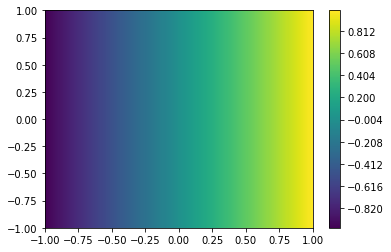

In [4]:
ufield.show()

* Gather the different fields in a `Fieldset` object

In [5]:
fieldset = FieldSet(ufield, vfield)

* Change u and v to a circular velocity:
  + around (0,0)
  + counter clock-wise
  + speed: $r = \sqrt{x^2 + y^2}$

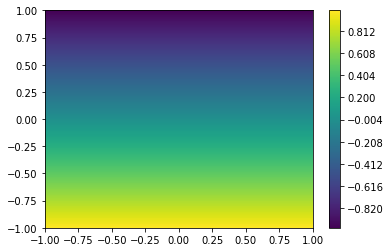

In [6]:
u = np.zeros((ydim, xdim))
v = np.zeros((ydim, xdim))
for j in range(ydim):
    for i in range(xdim):
        x_loc = x[i]
        y_loc = y[j]
        r = np.sqrt(x_loc**2 + y_loc**2)
        alpha = np.arctan2(y_loc, x_loc)
        u[j,i] = - r * np.sin(alpha)
        v[j,i] =   r * np.cos(alpha)
        
grid = RectilinearZGrid(x, y)
ufield = Field('U', u, grid=grid)
ufield.show()

In [7]:
# Try as much as possible to avoid for loops, using np functions instead !!

import time

# open loop
tic = time.time()
u = np.zeros((ydim, xdim))
v = np.zeros((ydim, xdim))
for j in range(ydim):
    for i in range(xdim):
        x_loc = x[i]
        y_loc = y[j]
        r = np.sqrt(x_loc**2 + y_loc**2)
        alpha = np.arctan2(y_loc, x_loc)
        u[j,i] = - r * np.sin(alpha)
        v[j,i] =   r * np.cos(alpha)
tac = time.time()
print("Open loop time: %g s" % (tac-tic))

# np array
tic = time.time()
(xx, yy) = np.meshgrid(x, y)
r = np.sqrt(xx**2 + yy**2)
alpha = np.arctan2(yy, xx)
u = - r * np.sin(alpha)
v =   r * np.cos(alpha)
tac = time.time()
print("np.array time: %g s" % (tac-tic))

Open loop time: 0.170243 s
np.array time: 0.00256801 s


# Creating Curvilinear grids

* Create a vector r ranging from 0 to 1 containing 50 elements.
* Create a vector theta ranging from 0 to 2*pi containing 100 elements.
* Create a curvilinear grid, with:
  + x = r cos(theta}
  + y = r sin(theta}
* Set a circular velocity field on that grid

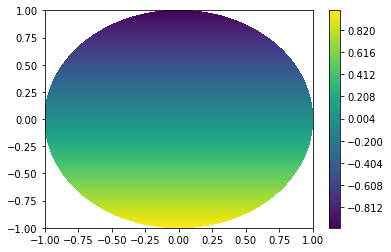

In [8]:
from parcels import CurvilinearZGrid

r_v = np.linspace(0,1,20)
theta_v = np.linspace(0,2*np.pi,200)
(r, theta) = np.meshgrid(r_v, theta_v)

x = r * np.cos(theta)
y = r * np.sin(theta)
grid = CurvilinearZGrid(x, y)

u = -r * np.sin(theta)
v =  r * np.cos(theta)

ufield = Field('U', u, grid=grid)
vfield = Field('V', v, grid=grid)
ufield.show()



* Create a speed field which contains the flow speed
* Gather the u, v fields in a `Fieldset` object.

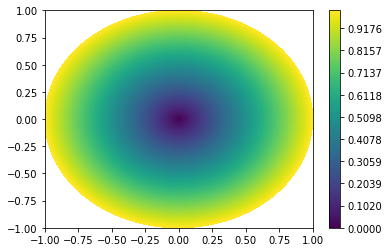

In [9]:
speed = np.sqrt(u**2+v**2)
sfield= Field('speed', speed, grid=grid)

fieldset = FieldSet(ufield,vfield,{'speed':sfield})
fieldset.speed.show()